# Notebook by -
## Himel Sarder
## LinkedIn : https://www.linkedin.com/in/himel-sarder/

# ***KNN Imputer***

The KNN Imputer is a powerful tool provided by the scikit-learn library for handling missing values in datasets. It uses the k-Nearest Neighbors (kNN) algorithm to impute missing values by considering the mean value from the nearest neighbors.

Key Principles

The KNN Imputer works by finding the nearest neighbors for each sample with missing values and imputing the missing values using the mean value from these neighbors. This method is particularly useful when the data has a pattern or structure that can be captured by the neighbors.

Parameters

### missing_values: The placeholder for the missing values. Default is np.nan.

### n_neighbors: Number of neighboring samples to use for imputation. Default is 5.

### weights: Weight function used in prediction. Options are 'uniform', 'distance', or a callable function.

### metric: Distance metric for searching neighbors. Default is 'nan_euclidean'.

### copy: If True, a copy of X will be created. If False, imputation will be done in-place.

### add_indicator: If True, a MissingIndicator transform will stack onto the output of the imputer’s transform.

### keep_empty_features: If True, features that consist exclusively of missing values when fit is called are returned in results when transform is called.


## Considerations

Choosing k: The choice of the number of neighbors (k) can significantly impact the imputation results. It is often recommended to test different values of k and use cross-validation to find the optimal value.

Distance Metric: The default distance metric is 'nan_euclidean', which handles missing values appropriately. However, other distance metrics can be used if needed.

Performance: KNNImputer can be computationally intensive, especially for large datasets. It is important to consider the trade-off between accuracy and computational cost.

In summary, the KNNImputer is a robust and effective method for imputing missing values in datasets, leveraging the k-Nearest Neighbors algorithm to provide accurate estimates based on the nearest neighbors.

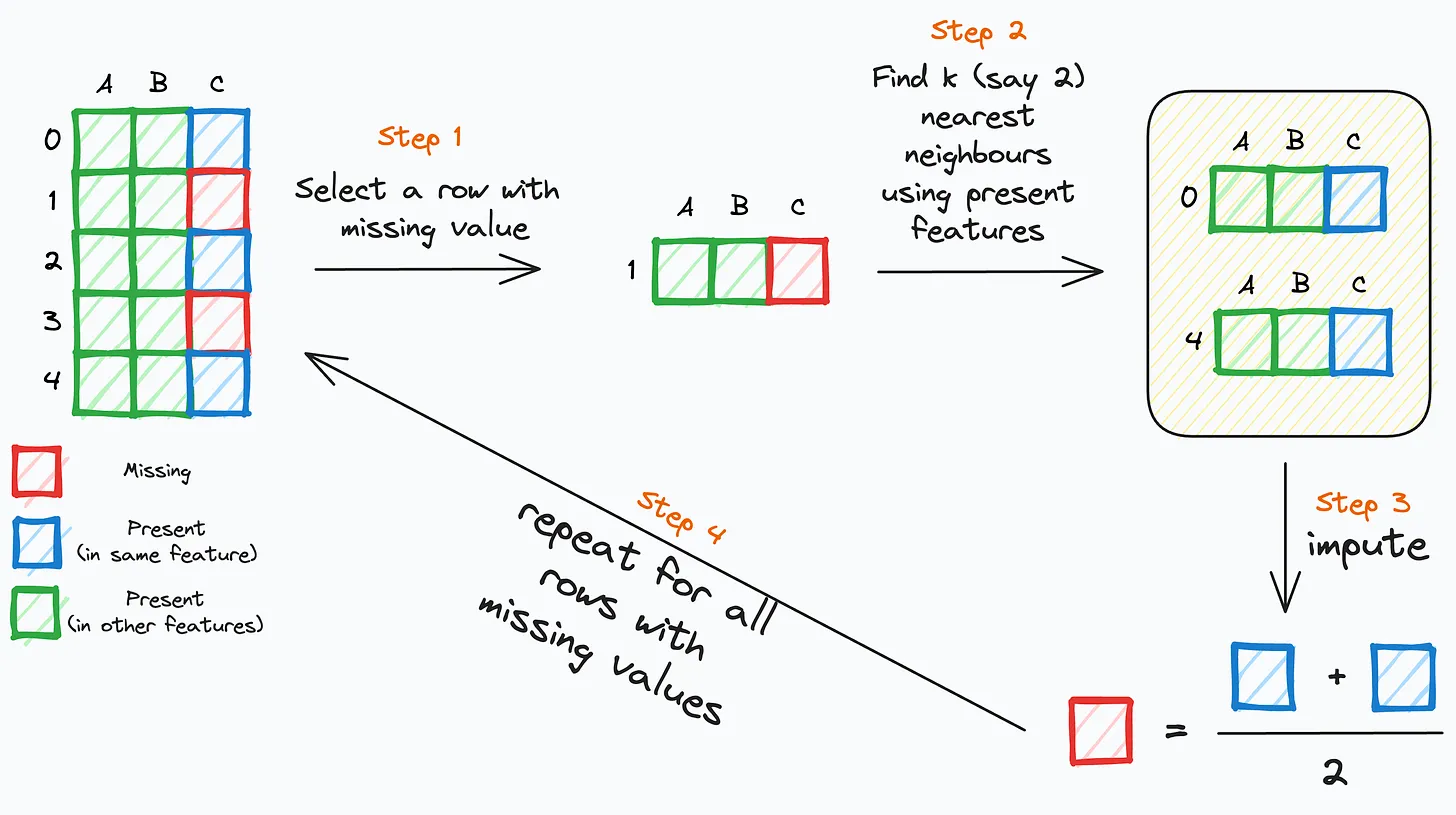

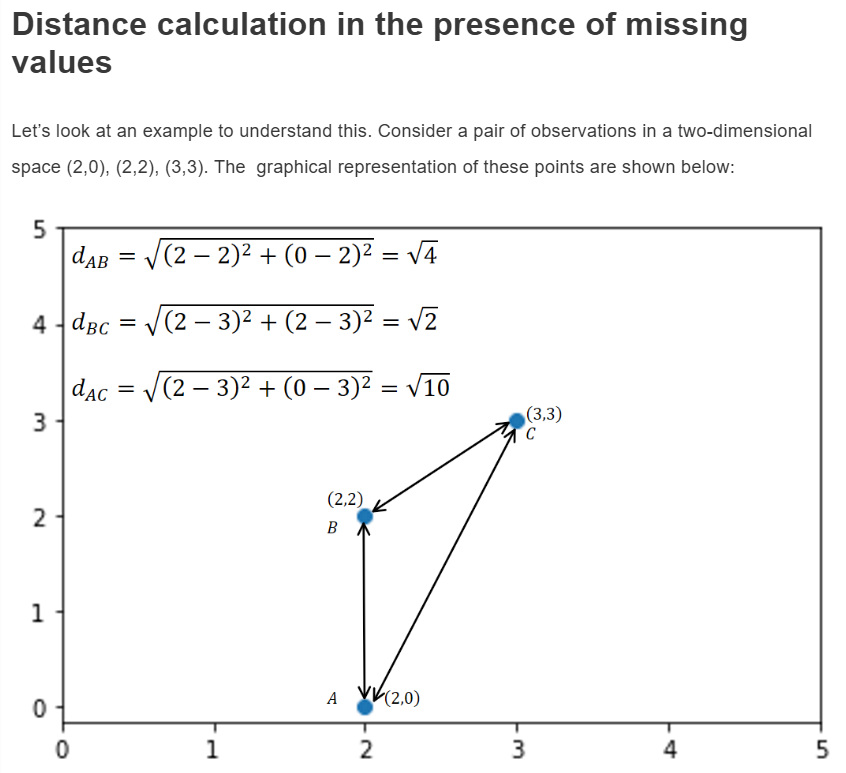

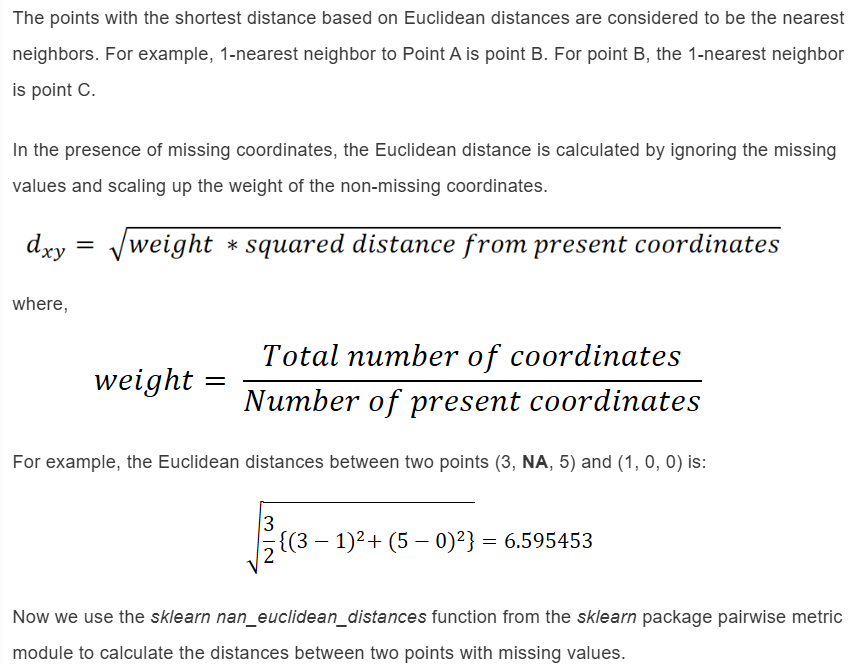

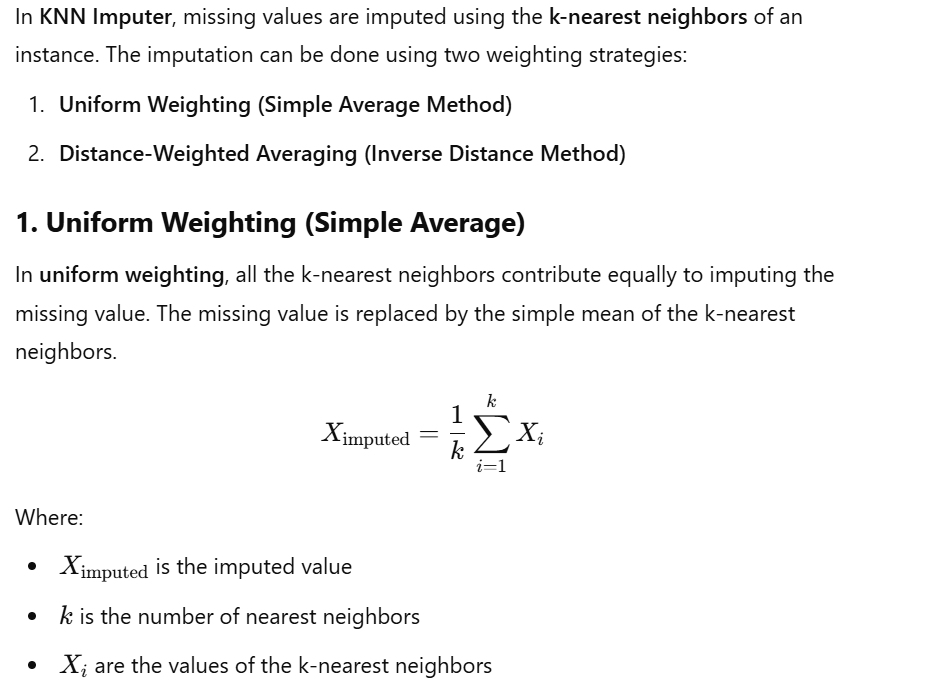

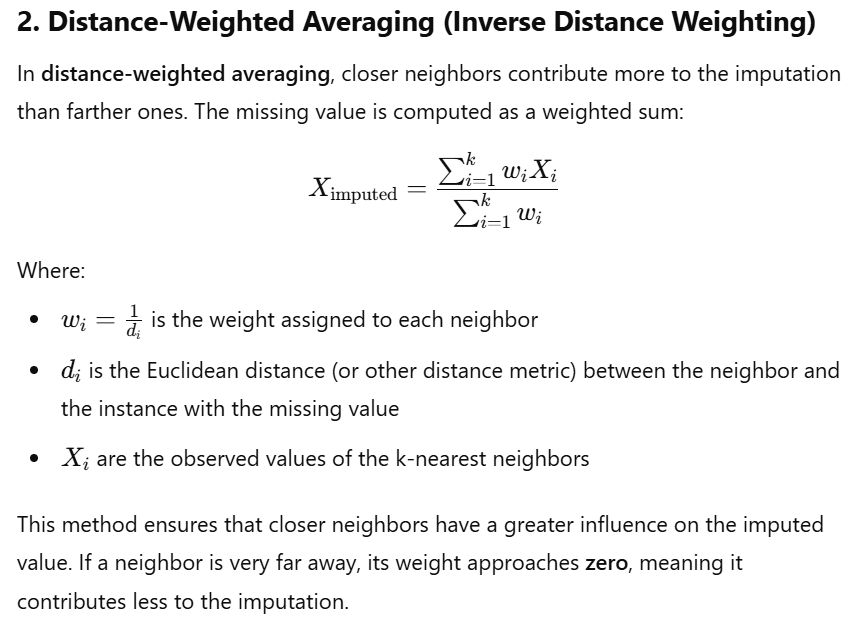

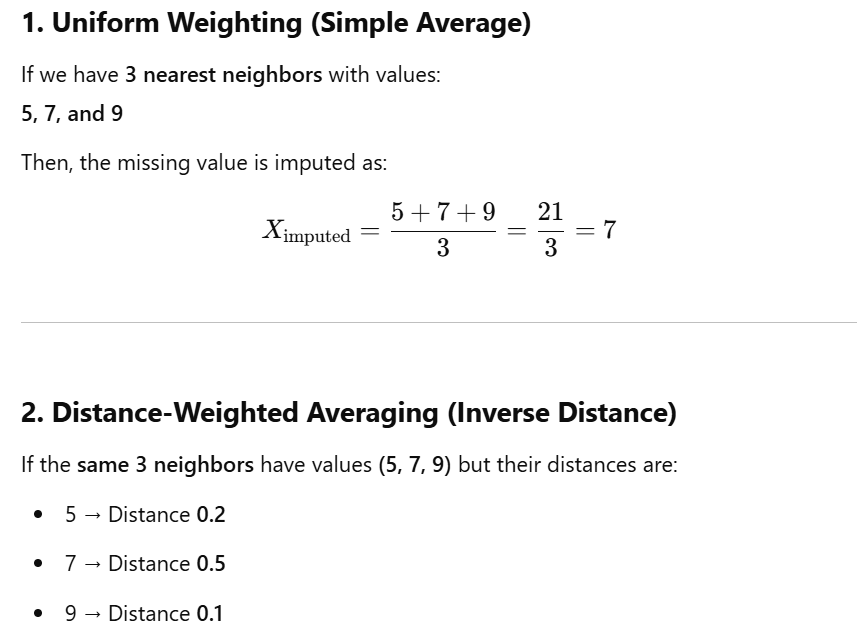

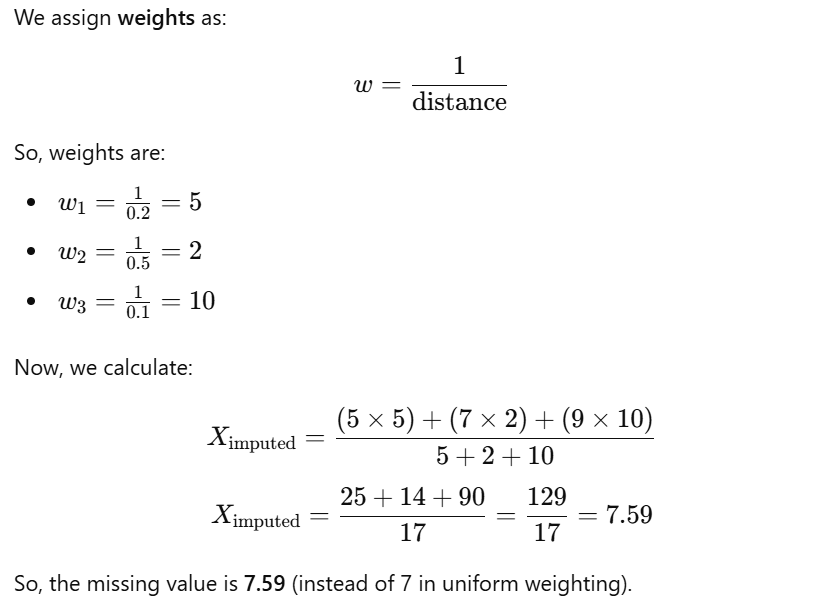

Why Use KNN Imputation?   
✅ Preserves Patterns: Unlike mean/median imputation, KNN imputation keeps relationships between features intact.   
✅ Works Well for Non-Normal Data: Handles skewed distributions and non-Gaussian data.   
✅ Adapts to Local Data Structure: Uses actual values from similar records instead of a fixed statistic.   
✅ Can Handle Both Numerical and Categorical Data: Works well for both types when properly configured.   

🚫 When NOT to Use KNN Imputation:   
When the dataset is very large (computationally expensive).   
When the missing data is not random (e.g., missing due to external factors).   
When the dataset is highly sparse (too many missing values).   


Advantages of KNN Imputation   
✔ Uses actual data points for imputation.   
✔ Handles numerical and categorical data.   
✔ Preserves relationships between variables.   
✔ More accurate than mean/median imputation.   

Disadvantages of KNN Imputation   
❌ Computationally expensive for large datasets.   
❌ Sensitive to outliers (distance-based method).   
❌ Does not work well with very sparse data.   

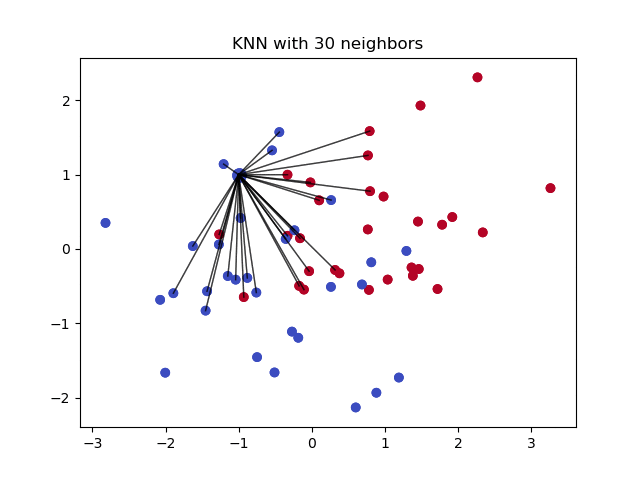

In [32]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [33]:
df = pd.read_csv('train.csv')[['Age','Pclass','Fare','Survived']]

In [34]:
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [35]:
df.isnull().mean() * 100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [36]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:
X_train.head()

,Age,Pclass,Fare
30,40.0,1,27.7208
10,4.0,3,16.7000
873,47.0,3,9.0000
182,9.0,3,31.3875
876,20.0,3,9.8458


In [53]:
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [54]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7150837988826816

In [55]:
# Comparision with Simple Imputer --> mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [56]:
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978

## Thank you